In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
# Part A

f = h5py.File('assign1_data1.h5', 'r')
dataKeys = list(f.keys())
print('The data keys are:' + str(dataKeys))

# Gathering the  train images, test images, train labels and test labels.
testims = f['testims']
testlbls = f['testlbls']
trainims = f['trainims']
trainlbls = f['trainlbls']
print('The size of testims is: ' + str(np.shape(testims)))
print('The size of testlbls is: ' + str(np.shape(testlbls)))
print('The size of trainims is: ' + str(np.shape(trainims)))
print('The size of trainlbls is: ' + str(np.shape(trainlbls)))

The data keys are:['testims', 'testlbls', 'trainims', 'trainlbls']
The size of testims is: (1300, 28, 28)
The size of testlbls is: (1300,)
The size of trainims is: (5200, 28, 28)
The size of trainlbls is: (5200,)


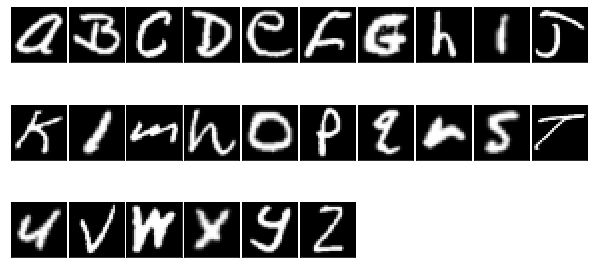

In [3]:
figureNo = 0
plt.figure(figureNo, figsize=(8,8))
label = 1

# Create 2 arrays for gathering 1 sample from each unique class.
# But these 2 arrays will gather different sample from each class.
uniqueClass = list()
uniqueClass2 = list()

# For visualizing a sample from each class.
# Also, store desired samples to uniqueClassX arrays.
for i, value in enumerate(trainlbls):
    if (label == value):
        uniqueClass.append(trainims[i])
        uniqueClass2.append(trainims[i+1])
        label += 1
        ax1 = plt.subplot(3, 10, label-1)
        ax1.imshow(trainims[i].T, cmap = 'gray')
        ax1.set_yticks([])
        ax1.set_xticks([])
        
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=0.5)
plt.show()

In [4]:
# Create the Correlation Matrix for same sample from each class

uniqueClass = np.asarray(uniqueClass)
uniqueClass = uniqueClass.reshape(np.shape(uniqueClass)[0], 28*28)
correlations = list()
for i in range(np.shape(uniqueClass)[0]):
    for j in range(np.shape(uniqueClass)[0]):
        correlations.append(np.corrcoef(uniqueClass[i], uniqueClass[j])[1,0])

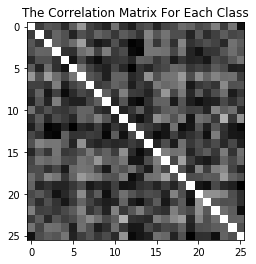

In [5]:
# The visualization of the Correlation Matrix.

correlations = np.asarray(correlations)
correlations = correlations.reshape(26,26)
figureNo += 1
plt.figure(figureNo)
plt.title('The Correlation Matrix For Each Class')
plt.imshow(correlations, cmap = 'gray')
plt.show()

In [6]:
# Create the Correlation Matrix for different sample from each class

uniqueClass2 = np.asarray(uniqueClass2)
uniqueClass2 = uniqueClass2.reshape(np.shape(uniqueClass2)[0], 28*28)
corrs_differentSet = list()
for i in range(np.shape(uniqueClass)[0]):
    for j in range(np.shape(uniqueClass)[0]):
        corrs_differentSet.append(np.corrcoef(uniqueClass[i], uniqueClass2[j])[1,0])

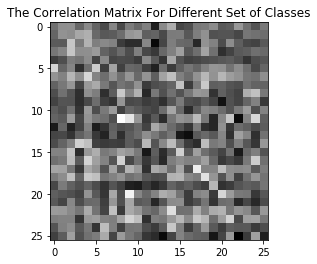

In [7]:
# The visualization of the Correlation Matrix.

corrs_differentSet = np.asarray(corrs_differentSet)
corrs_differentSet = corrs_differentSet.reshape(26,26)
figureNo += 1
plt.figure(figureNo)
plt.title('The Correlation Matrix For Different Set of Classes')
plt.imshow(corrs_differentSet, cmap = 'gray')
plt.show()

In [8]:
# Part B

# For getting the same result each run.
np.random.seed(8)

# Since each image has dimensions of 28*28 and there are 26 classes, weights vector will be of size [26, 28*28]
# And there is a bias for each class so the shape of bias vector is [26,1]
# Values for both weights and bias vectors are random numbers from a Gaussian Distribution with 0 mean and 0.01 std.
weights = np.random.normal( loc=0, scale=0.01, size=(26,28*28))
bias = np.random.normal( loc=0, scale=0.01, size=(26,1))

# The labels vector's values are from 1 to 26. This could cause errors so, they will be reshaped into one-hot encoding.
trainlabels = np.zeros((26, np.shape(trainlbls)[0]))
testlabels  = np.zeros((26, np.shape(testlbls)[0]))

for i, values in enumerate(trainlbls):
    trainlabels[26 - int(values),i] = 1

for i, values in enumerate(testlbls):
    testlabels[26 - int(values),i] = 1

# For rows I wanted to keep each sample. For both testlabels and trainlabels, I have taken the transpose
# to keep the arrays (1300,26) and (5200,26)
trainlabels = trainlabels.T
testlabels = testlabels.T

# Also, make the train and test images a numpy array for eaze.
trainimages = np.asarray(trainims)
testimages = np.asarray(testims)

# Example of class 1(A,a) and class 26(Z,z) representations
print('Class 1 (A,a) is: ' + str(trainlabels[0]))
print('Class 26 (Z,z) is: ' + str(trainlabels[5199]))

Class 1 (A,a) is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
Class 26 (Z,z) is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [9]:
# Sigmoid function will be used in training the perceptron model.
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result

In [10]:
# Mean Square Error as the loss function
def MSE(error):
    result = np.mean(error**2)
    return result

In [11]:
def perceptronTrain(train_data, labels, weights, bias, iterations, learningRate):

    MSE_loss = list()
    
    for i in range(iterations):

        # Selecting a random image and its label.
        random = np.random.randint(0,5200,1)
        selectedImage = train_data[random,:]
        selectedLabel = labels[random,:]

        # Normalization (For setting each pixel between 0 and 1. )
        selectedImage = selectedImage / np.amax(selectedImage)

        # Calculation of the weighted sum and its sigmoid.
        weightedSum = weights.dot(selectedImage.T) - bias
        y_ = sigmoid(weightedSum)
        y_difference = selectedLabel.T - y_

        # Update Rules

        update = y_difference*y_*(1-y_)
        weight_update = -2*learningRate * (update).dot(selectedImage)
        bias_update = 2*learningRate * update

        weights = weights - weight_update
        bias = bias - bias_update

        # Loss Function
        MSE_loss.append(MSE(y_difference))
        
    return weights, bias, MSE_loss


In [12]:
iterations = 10000

# Created the learningRateArray to select the optimal learning rate.
learningRateArray = np.arange(0.01, 0.2, 0.01)

# Flatten the image so that we can represent a neuron for every pixel.
trainimages_flat = trainimages.reshape(5200,28*28)

# Selecting the best learning rate amongs the learningRateArray.

# For each learning rate, selection is made by comparing the mean of last item
# of the MSE loss.

# NOTE : Takes about a minute to run.
best = np.inf
for learningRate in learningRateArray:
    np.random.seed(8)
    weights = np.random.normal( loc=0, scale=0.01, size=(26,28*28))
    bias = np.random.normal( loc=0, scale=0.01, size=(26,1))
    weights_best, bias_best, MSE_loss_best = perceptronTrain(trainimages_flat, trainlabels, weights, bias, iterations, learningRate)
    if ( np.mean(MSE_loss_best[-1]) < best):
        best = np.mean(MSE_loss_best[-1])
        learningRateBest = learningRate

print("The optimal learning rate is %.2f" % learningRateBest)


# Training with the optimal learning rate.
np.random.seed(8)
weights = np.random.normal( loc=0, scale=0.01, size=(26,28*28))
bias = np.random.normal( loc=0, scale=0.01, size=(26,1))
weights_best, bias_best, MSE_loss_best = perceptronTrain(trainimages_flat, trainlabels, weights, bias, iterations, learningRateBest)

The optimal learning rate is 0.16


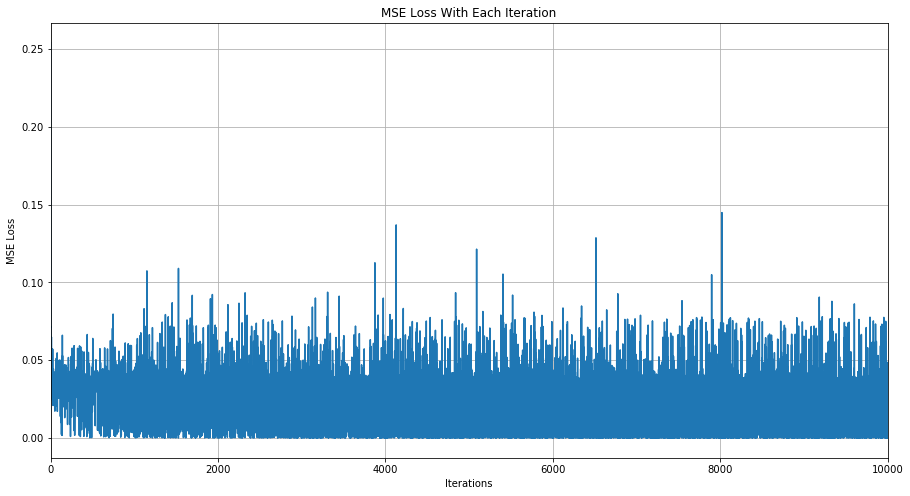

In [13]:

# Visualization of the MSE loss for 10000 iteration

figureNo += 1
plt.figure(figureNo, figsize=(15,8))
plt.plot(MSE_loss_best)
plt.xlim(0, 10000)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('MSE Loss With Each Iteration')
plt.grid()

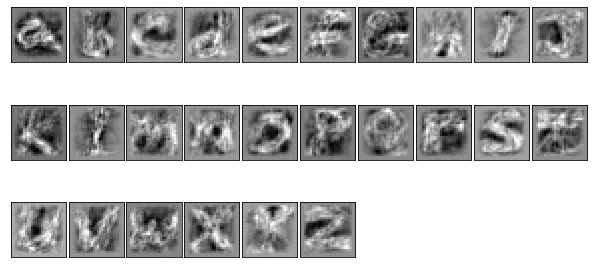

In [14]:
# Reshaping the weights matrix to its original image size
weights_best = weights_best.reshape(26,28,28)

# Visualization of the weights matrix
figureNo += 1
plt.figure(figureNo, figsize=(8,8))
for i, value in enumerate(weights_best):
    ax1 = plt.subplot(3, 10, i+1)
    ax1.imshow(weights_best[25- i].T, cmap = 'gray')
    ax1.set_yticks([])
    ax1.set_xticks([])
    
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=0.5)
plt.show()

In [15]:
# Part C

# For getting the same result each run.
np.random.seed(8)

# Since each image has dimensions of 28*28 and there are 26 classes, weights vector will be of size [26, 28*28]
# And there is a bias for each class so the shape of bias vector is [26,1]
# Values for both weights and bias vectors are random numbers from a Gaussian Distribution with 0 mean and 0.01 std.
weightsHigh = np.random.normal( loc=0, scale=0.01, size=(26,28*28))
biasHigh = np.random.normal( loc=0, scale=0.01, size=(26,1))

weightsLow = np.random.normal( loc=0, scale=0.01, size=(26,28*28))
biasLow = np.random.normal( loc=0, scale=0.01, size=(26,1))

iterations = 10000
learningRateHigh = 0.9
learningRateLow = 0.0001

weights_high, bias_high, MSE_loss_high = perceptronTrain(trainimages_flat, trainlabels, weightsHigh, biasHigh, iterations, learningRateHigh)
weights_low, bias_low, MSE_loss_low = perceptronTrain(trainimages_flat, trainlabels, weightsLow, biasLow, iterations, learningRateLow)

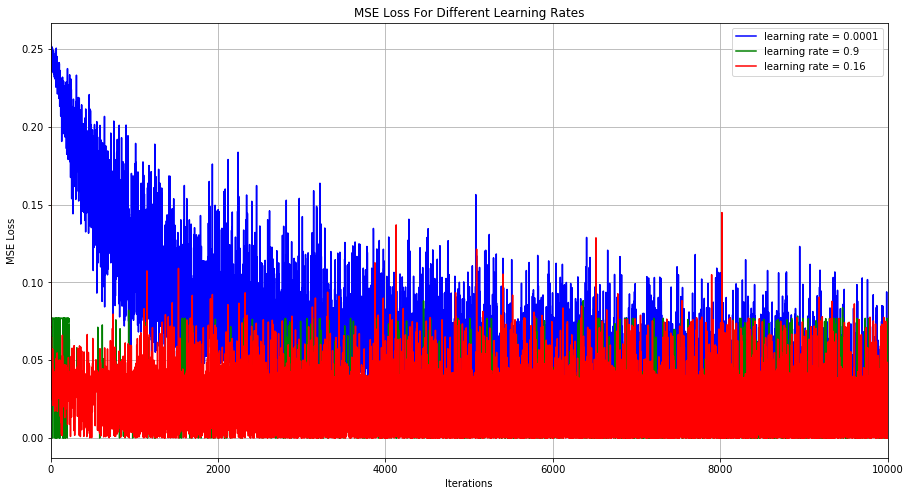

In [22]:
figureNo += 1
plt.figure(figureNo, figsize=(15,8))
plt.plot(MSE_loss_low, 'b')
plt.plot(MSE_loss_high, 'g')
plt.plot(MSE_loss_best, 'r')

plt.xlim(0, 10000)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('MSE Loss For Different Learning Rates')
plt.legend(["learning rate = " + str(learningRateLow), "learning rate = " + str(learningRateHigh), "learning rate = %.2f" %(learningRateBest)])
plt.grid()

In [17]:
# Part D

# predict function takes the testimages and predicts the output 
# with the calculated weights and bias.
# returns the class value as integer.
def predict(testimages, weights, bias):
    result = list()
    testimages = testimages.reshape(1300,28*28)
    weights = weights.reshape(26,28*28)
    for i in range(np.shape(testimages)[0]):
        weightedSum = weights.dot(testimages[i].T).reshape(-1,1) - bias
        y_ = sigmoid(weightedSum)
        position = np.argmax(y_)        
        result.append(26 - position)
    return result

In [18]:
# Predictions for optimal, high and low learningrates.

test_best = predict(testimages, weights_best, bias_best)
test_high = predict(testimages, weights_high, bias_high)
test_low = predict(testimages, weights_low, bias_low)

c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# For calculating the accuracy, accuracyCalc function is defined.

def accuracyCalc(x, y):
    result = 0
    count = 0
    size = np.shape(x)[0]
    sentence = 'The accuracy of the model is: '
    for i in range(size):
        if (x[i] == y[i]):
            count = count +1
    result = (count / size) * 100
    
    return result

In [20]:
accuracy_best = accuracyCalc(test_best, testlbls)
accuracy_high = accuracyCalc(test_high, testlbls)
accuracy_low = accuracyCalc(test_low, testlbls)
print('Accuracy for the learning rate = %.2f is : %s' %(learningRateBest,accuracy_best))
print('Accuracy for the learning rate = ' +str(learningRateHigh) +'  is: ' +str(accuracy_high))
print('Accuracy for the learning rate = ' +str(learningRateLow) +'  is: ' +str(accuracy_low))

Accuracy for the learning rate = 0.16 is : 49.15384615384615
Accuracy for the learning rate = 0.9  is: 13.615384615384615
Accuracy for the learning rate = 0.0001  is: 24.0
